#**ML Model for Biological Activity Data of Chemical Compound (QSAR)**

##**ChEMBL Database**


* The [*ChEMBL*](https://www.ebi.ac.uk/chembl/) is a manually curated chemical database of bioactive molecules with drug inducing properties on in the human brain.
* The [*ChEMBL*](https://www.ebi.ac.uk/chembl/) database contains compound bioactivity data against drug targets. Bioactivity is reported in Ki, Kd, IC50, and EC50. Data can be filtered and analyzed to develop compound screening libraries for lead identification during drug discovery.


In [1]:
#Installation of ChEMBL Web Service Package
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 1.4 MB/s eta 0:00:00
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
#Importing libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
pd.set_option('display.max_columns',100)                          #Displaying all columns
pd.set_option('display.max_rows',100)                             #Displaying all rows

In [3]:
# Finding target
target = new_client.target
target_list = target.search('cancer')
target_p = pd.DataFrame.from_dict(target_list)                      #Cancer Target list into Dataframe
target_p

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cancer-related nucleoside-triphosphatase,14.0,False,CHEMBL4295936,"[{'accession': 'Q9BSD7', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,12.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],None,cancer cell lines,11.0,False,CHEMBL614375,[],CELL-LINE,NaN
3,"[{'xref_id': 'O14519', 'xref_name': None, 'xre...",Homo sapiens,Cyclin-dependent kinase 2-associated protein 1,11.0,False,CHEMBL5578,"[{'accession': 'O14519', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL3713916,"[{'accession': 'Q15743', 'component_descriptio...",SINGLE PROTEIN,9606.0
5,[],Mus musculus,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL4523380,"[{'accession': 'Q8BFQ3', 'component_descriptio...",SINGLE PROTEIN,10090.0
6,[],Homo sapiens,Spindlin-1,11.0,False,CHEMBL4523509,"[{'accession': 'Q9Y657', 'component_descriptio...",SINGLE PROTEIN,9606.0
7,"[{'xref_id': 'P04075', 'xref_name': None, 'xre...",Homo sapiens,Fructose-bisphosphate aldolase A,10.0,False,CHEMBL2106,"[{'accession': 'P04075', 'component_descriptio...",SINGLE PROTEIN,9606.0
8,[],None,cancer cell lines (55),10.0,False,CHEMBL614376,[],CELL-LINE,NaN
9,[],Homo sapiens,Breast cancer cell lines,10.0,False,CHEMBL614788,[],CELL-LINE,9606.0


In [4]:
#Selection of Target Protein ATP-binding cassette sub-family G member 2
select_target=target_p.target_chembl_id[46]
select_target

'CHEMBL5393'

##**Retrieving bioactivity data for  ATP-binding cassette sub-family G member 2 (CHEMBL5393) that are reported as IC 50  values in nM (nanomolar) unit.**

# **Pre-Processing of Bioactivity Data**


* The bioactivity data is in the **IC50** unit. 

*   The half maximal inhibitory concentration **(IC50)** is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. **IC50** is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by **50%**. The biological component could be an enzyme, cell, cell receptor or microorganism. **IC50** values are typically expressed as molar concentration.
*  Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.


In [5]:
activity = new_client.activity
data = activity.filter(target_chembl_id=select_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(data)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831438,[],CHEMBL919518,Inhibition of BCRP expressed in human HEK293 c...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,None,None,CHEMBL1142979,J. Med. Chem.,2007,"{'bei': '17.98', 'le': '0.34', 'lle': '3.23', ...",CHEMBL221371,BOERAVINONE G,CHEMBL221371,6.16,0,http://www.openphacts.org/units/Nanomolar,627980,=,1,1,=,None,IC50,nM,None,700.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,0.7
1,None,1831439,[],CHEMBL919518,Inhibition of BCRP expressed in human HEK293 c...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,None,None,CHEMBL1142979,J. Med. Chem.,2007,"{'bei': '15.72', 'le': '0.29', 'lle': '2.37', ...",CHEMBL222265,BOERAVINONE H,CHEMBL222265,5.60,0,http://www.openphacts.org/units/Nanomolar,627981,=,1,1,=,None,IC50,nM,None,2500.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,1940569,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cccc2[nH]c3ccccc3c(=O)c12,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '23.09', 'le': '0.42', 'lle': '2.51', ...",CHEMBL243813,None,CHEMBL243813,5.20,0,http://www.openphacts.org/units/Nanomolar,649844,=,1,1,=,None,IC50,nM,None,6300.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,6.3
3,None,1940570,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '13.55', 'le': '0.25', 'lle': '2.18', ...",CHEMBL243169,None,CHEMBL243169,5.86,0,http://www.openphacts.org/units/Nanomolar,649856,=,1,1,=,None,IC50,nM,None,1380.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,1.38
4,None,1940571,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '15.53', 'le': '0.28', 'lle': '2.58', ...",CHEMBL243168,None,CHEMBL243168,6.25,0,http://www.openphacts.org/units/Nanomolar,649855,=,1,1,=,None,IC50,nM,None,560.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,None,23227549,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4825885,Inhibition of ABCG2 (unknown origin) expressed...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,None,None,CHEMBL4825661,J Med Chem,2021,"{'bei': '17.02', 'le': '0.40', 'lle': '2.06', ...",CHEMBL4847601,None,CHEMBL4847601,5.84,0,http://www.openphacts.org/units/Nanomolar,3612978,=,1,1,=,None,IC50,nM,None,1460.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,1.46
1620,None,23227946,[],CHEMBL4825978

In [6]:
df.to_csv('bioactivity_data.csv',index=False)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [8]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/ML Model QSAR"
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/ML Model QSAR"
! ls "/content/gdrive/My Drive/Colab Notebooks/ML Model QSAR"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/ML Model QSAR’: File exists
bioactivity_data.csv  bioactivity_preprocessed_data_class.csv


# **Pre-Processing of Bioactivity Data**


* The bioactivity data is in the **IC50** unit. 

*   The half maximal inhibitory concentration **(IC50)** is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. **IC50** is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by **50%**. The biological component could be an enzyme, cell, cell receptor or microorganism. **IC50** values are typically expressed as molar concentration.
*  Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.


---



In [9]:
# Removing missing values in standard_value and canonical_smiles

df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-9-ddf8dead5b0a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831438,[],CHEMBL919518,Inhibition of BCRP expressed in human HEK293 c...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,None,None,CHEMBL1142979,J. Med. Chem.,2007,"{'bei': '17.98', 'le': '0.34', 'lle': '3.23', ...",CHEMBL221371,BOERAVINONE G,CHEMBL221371,6.16,0,http://www.openphacts.org/units/Nanomolar,627980,=,1,1,=,None,IC50,nM,None,700.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,0.7
1,None,1831439,[],CHEMBL919518,Inhibition of BCRP expressed in human HEK293 c...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,None,None,CHEMBL1142979,J. Med. Chem.,2007,"{'bei': '15.72', 'le': '0.29', 'lle': '2.37', ...",CHEMBL222265,BOERAVINONE H,CHEMBL222265,5.60,0,http://www.openphacts.org/units/Nanomolar,627981,=,1,1,=,None,IC50,nM,None,2500.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,1940569,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cccc2[nH]c3ccccc3c(=O)c12,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '23.09', 'le': '0.42', 'lle': '2.51', ...",CHEMBL243813,None,CHEMBL243813,5.20,0,http://www.openphacts.org/units/Nanomolar,649844,=,1,1,=,None,IC50,nM,None,6300.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,6.3
3,None,1940570,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '13.55', 'le': '0.25', 'lle': '2.18', ...",CHEMBL243169,None,CHEMBL243169,5.86,0,http://www.openphacts.org/units/Nanomolar,649856,=,1,1,=,None,IC50,nM,None,1380.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,1.38
4,None,1940571,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '15.53', 'le': '0.28', 'lle': '2.58', ...",CHEMBL243168,None,CHEMBL243168,6.25,0,http://www.openphacts.org/units/Nanomolar,649855,=,1,1,=,None,IC50,nM,None,560.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,None,23227549,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4825885,Inhibition of ABCG2 (unknown origin) expressed...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,None,None,CHEMBL4825661,J Med Chem,2021,"{'bei': '17.02', 'le': '0.40', 'lle': '2.06', ...",CHEMBL4847601,None,CHEMBL4847601,5.84,0,http://www.openphacts.org/units/Nanomolar,3612978,=,1,1,=,None,IC50,nM,None,1460.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,1.46
1620,None,23227946,[],CHEMBL4825978

In [10]:
len(df2.canonical_smiles.unique())

962

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831438,[],CHEMBL919518,Inhibition of BCRP expressed in human HEK293 c...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,None,None,CHEMBL1142979,J. Med. Chem.,2007,"{'bei': '17.98', 'le': '0.34', 'lle': '3.23', ...",CHEMBL221371,BOERAVINONE G,CHEMBL221371,6.16,0,http://www.openphacts.org/units/Nanomolar,627980,=,1,1,=,None,IC50,nM,None,700.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,0.7
1,None,1831439,[],CHEMBL919518,Inhibition of BCRP expressed in human HEK293 c...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,None,None,CHEMBL1142979,J. Med. Chem.,2007,"{'bei': '15.72', 'le': '0.29', 'lle': '2.37', ...",CHEMBL222265,BOERAVINONE H,CHEMBL222265,5.60,0,http://www.openphacts.org/units/Nanomolar,627981,=,1,1,=,None,IC50,nM,None,2500.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,1940569,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cccc2[nH]c3ccccc3c(=O)c12,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '23.09', 'le': '0.42', 'lle': '2.51', ...",CHEMBL243813,None,CHEMBL243813,5.20,0,http://www.openphacts.org/units/Nanomolar,649844,=,1,1,=,None,IC50,nM,None,6300.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,6.3
3,None,1940570,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '13.55', 'le': '0.25', 'lle': '2.18', ...",CHEMBL243169,None,CHEMBL243169,5.86,0,http://www.openphacts.org/units/Nanomolar,649856,=,1,1,=,None,IC50,nM,None,1380.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,1.38
4,None,1940571,[],CHEMBL892735,Inhibition of ABCG2 expressed in HEK293 cells ...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,None,None,CHEMBL1147844,Bioorg. Med. Chem.,2007,"{'bei': '15.53', 'le': '0.28', 'lle': '2.58', ...",CHEMBL243168,None,CHEMBL243168,6.25,0,http://www.openphacts.org/units/Nanomolar,649855,=,1,1,=,None,IC50,nM,None,560.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,None,23227546,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4825885,Inhibition of ABCG2 (unknown origin) expressed...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21,None,None,CHEMBL4825661,J Med Chem,2021,"{'bei': '17.58', 'le': '0.33', 'lle': '1.39', ...",CHEMBL4861780,None,CHEMBL4861780,5.97,0,http://www.openphacts.org/units/Nanomolar,3612975,=,1,1,=,None,IC50,nM,None,1080.0,CHEMBL5393,Homo sapiens,ATP-binding cassette sub-family G member 2,9606,None,None,IC50,uM,UO_0000065,None,1.08
1617,None,23227547,"[{'com

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.to_csv('bioactivity_preprocessed_data.csv',index=False)

In [13]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,700.0
1,CHEMBL222265,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,2500.0
2,CHEMBL243813,COc1cccc2[nH]c3ccccc3c(=O)c12,6300.0
3,CHEMBL243169,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,1380.0
4,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,560.0
...,...,...,...
957,CHEMBL4861780,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21,1080.0
958,CHEMBL4868688,COc1c(Cl)cccc1-c1noc(-c2cnc3sccc3c2)n1,23600.0
959,CHEMBL4877250,CC(C)n1ccc(Cc2nc(-c3cnc4c(F)cccc4c3)no2)n1,7110.0
960,CHEMBL4847601,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,1460.0


In [14]:
bioactivity_class = []
for i in df.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [15]:
df=pd.concat([df,pd.Series(bioactivity_class)], axis=1)
df.columns=['molecule_chembl_id','canonical_smiles','standard_value','bioactivity_class']
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,700.0,active
1,CHEMBL222265,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,2500.0,intermediate
2,CHEMBL243813,COc1cccc2[nH]c3ccccc3c(=O)c12,6300.0,intermediate
3,CHEMBL243169,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,1380.0,intermediate
4,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,560.0,active
...,...,...,...,...
957,CHEMBL4861780,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21,1080.0,intermediate
958,CHEMBL4868688,COc1c(Cl)cccc1-c1noc(-c2cnc3sccc3c2)n1,23600.0,inactive
959,CHEMBL4877250,CC(C)n1ccc(Cc2nc(-c3cnc4c(F)cccc4c3)no2)n1,7110.0,intermediate
960,CHEMBL4847601,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,1460.0,intermediate


In [16]:
df.to_csv('bioactivity_preprocessed_data_class.csv', index=False)
! cp bioactivity_preprocessed_data_class.csv "/content/gdrive/My Drive/Colab Notebooks/ML Model QSAR"
! ls "/content/gdrive/My Drive/Colab Notebooks/ML Model QSAR"

bioactivity_data.csv  bioactivity_preprocessed_data_class.csv


## **Install Conda & Rdkit Libraries**

In [17]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-01-28 02:21:10--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   180MB/s    in 0.5s    

2023-01-28 02:21:11 (180 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# **Lipinski Descriptors (Rule of 5) -**
**Lipinski's rule of five**, also known as **Pfizer's rule of five** or simply the rule of five (RO5), is a rule of thumb to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would make it a likely orally active drug in humans. The rule was formulated by **Christopher A. Lipinski** in 1997, based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules.

The Lipinski's Rule stated the following:


*   Molecular Mass < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10

In [18]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [19]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [20]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [21]:
df_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL221371,700.0,active,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3
1,CHEMBL222265,2500.0,intermediate,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC
2,CHEMBL243813,6300.0,intermediate,COc1cccc2[nH]c3ccccc3c(=O)c12
3,CHEMBL243169,1380.0,intermediate,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...
4,CHEMBL243168,560.0,active,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...
...,...,...,...,...
957,CHEMBL4861780,1080.0,intermediate,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21
958,CHEMBL4868688,23600.0,inactive,COc1c(Cl)cccc1-c1noc(-c2cnc3sccc3c2)n1
959,CHEMBL4877250,7110.0,intermediate,CC(C)n1ccc(Cc2nc(-c3cnc4c(F)cccc4c3)no2)n1
960,CHEMBL4847601,1460.0,intermediate,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1


In [22]:
# Creating Lipinski Descriptor function

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [23]:
df_lipinski = lipinski(df_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,342.303,2.91720,2.0,7.0
1,356.330,3.22562,2.0,7.0
2,225.247,2.68990,1.0,2.0
3,432.476,3.67960,2.0,5.0
4,402.450,3.67100,2.0,4.0
...,...,...,...,...
957,339.349,4.58220,1.0,5.0
958,343.795,4.67530,0.0,6.0
959,337.358,3.79210,0.0,6.0
960,342.858,3.77540,1.0,7.0


In [24]:
df_total = pd.concat([df,df_lipinski], axis=1)
df_total

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,700.0,active,342.303,2.91720,2.0,7.0
1,CHEMBL222265,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,2500.0,intermediate,356.330,3.22562,2.0,7.0
2,CHEMBL243813,COc1cccc2[nH]c3ccccc3c(=O)c12,6300.0,intermediate,225.247,2.68990,1.0,2.0
3,CHEMBL243169,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,1380.0,intermediate,432.476,3.67960,2.0,5.0
4,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,560.0,active,402.450,3.67100,2.0,4.0
...,...,...,...,...,...,...,...,...
957,CHEMBL4861780,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21,1080.0,intermediate,339.349,4.58220,1.0,5.0
958,CHEMBL4868688,COc1c(Cl)cccc1-c1noc(-c2cnc3sccc3c2)n1,23600.0,inactive,343.795,4.67530,0.0,6.0
959,CHEMBL4877250,CC(C)n1ccc(Cc2nc(-c3cnc4c(F)cccc4c3)no2)n1,7110.0,intermediate,337.358,3.79210,0.0,6.0
960,CHEMBL4847601,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,1460.0,intermediate,342.858,3.77540,1.0,7.0


In [25]:
df_total.to_csv('bioactivity_lipinski_calculation.csv', index=False)

## **IC50 to pIC50**
Distributing **IC50** values more uniformly by converting into negative logarithmic scale which is **-log10(IC50)** :-


*   Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10^-9
*   Take the molar value and apply -log10
*   Delete the standard_value column and create a new pIC50 column


In [26]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    n = input.drop('standard_value_norm', 1)
        
    return n

In [27]:
df_total.standard_value.describe()

count       962.000000
mean       9782.831071
std       38066.434761
min           4.620000
25%         317.500000
50%        1260.000000
75%        7539.335000
max      851138.040000
Name: standard_value, dtype: float64

In [28]:
# Checking limits
-np.log10( (10**-9)* 100000000 )

1.0

In [29]:
# Checking limits
-np.log10( (10**-9)* 10000000000 )

-1.0

In [30]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    n = input.drop('standard_value', 1)
        
    return n

In [31]:
df_norm = norm_value(df_total)
df_norm

<ipython-input-30-35b24d1e46b6>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  n = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,active,342.303,2.91720,2.0,7.0,700.0
1,CHEMBL222265,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,intermediate,356.330,3.22562,2.0,7.0,2500.0
2,CHEMBL243813,COc1cccc2[nH]c3ccccc3c(=O)c12,intermediate,225.247,2.68990,1.0,2.0,6300.0
3,CHEMBL243169,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,intermediate,432.476,3.67960,2.0,5.0,1380.0
4,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,active,402.450,3.67100,2.0,4.0,560.0
...,...,...,...,...,...,...,...,...
957,CHEMBL4861780,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21,intermediate,339.349,4.58220,1.0,5.0,1080.0
958,CHEMBL4868688,COc1c(Cl)cccc1-c1noc(-c2cnc3sccc3c2)n1,inactive,343.795,4.67530,0.0,6.0,23600.0
959,CHEMBL4877250,CC(C)n1ccc(Cc2nc(-c3cnc4c(F)cccc4c3)no2)n1,intermediate,337.358,3.79210,0.0,6.0,7110.0
960,CHEMBL4847601,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,intermediate,342.858,3.77540,1.0,7.0,1460.0


In [32]:
df_norm.standard_value_norm.describe()

count       962.000000
mean       9782.831071
std       38066.434761
min           4.620000
25%         317.500000
50%        1260.000000
75%        7539.335000
max      851138.040000
Name: standard_value_norm, dtype: float64

In [33]:
df_final = pIC50(df_norm)
df_final

<ipython-input-26-f99157e51187>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  n = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,active,342.303,2.91720,2.0,7.0,6.154902
1,CHEMBL222265,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,intermediate,356.330,3.22562,2.0,7.0,5.602060
2,CHEMBL243813,COc1cccc2[nH]c3ccccc3c(=O)c12,intermediate,225.247,2.68990,1.0,2.0,5.200659
3,CHEMBL243169,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,intermediate,432.476,3.67960,2.0,5.0,5.860121
4,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,active,402.450,3.67100,2.0,4.0,6.251812
...,...,...,...,...,...,...,...,...
957,CHEMBL4861780,CC(C)n1ncc2cc(Nc3ncnc4c(F)c(F)ccc34)ccc21,intermediate,339.349,4.58220,1.0,5.0,5.966576
958,CHEMBL4868688,COc1c(Cl)cccc1-c1noc(-c2cnc3sccc3c2)n1,inactive,343.795,4.67530,0.0,6.0,4.627088
959,CHEMBL4877250,CC(C)n1ccc(Cc2nc(-c3cnc4c(F)cccc4c3)no2)n1,intermediate,337.358,3.79210,0.0,6.0,5.148130
960,CHEMBL4847601,CSc1nsc(NC(=O)c2sc3ncccc3c2Cl)n1,intermediate,342.858,3.77540,1.0,7.0,5.835647


In [34]:
df_final.pIC50.describe()

count    962.000000
mean       5.823675
std        0.862370
min        3.070000
25%        5.122692
50%        5.899629
75%        6.498258
max        8.335358
Name: pIC50, dtype: float64

In [35]:
df_final.to_csv('bioactivity_pIC50.csv', index=False)

## **Removing Intermediate Bioactivity Class**

In [36]:
df_final_2 = df_final[df_final['bioactivity_class'] != 'intermediate']
df_final_2

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,active,342.303,2.91720,2.0,7.0,6.154902
4,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,active,402.450,3.67100,2.0,4.0,6.251812
5,CHEMBL243167,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccccc4[nH]c23)cc1OC,active,402.450,3.67100,2.0,4.0,6.346787
6,CHEMBL397235,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccccc4[nH]c23)cc1,active,372.424,3.66240,2.0,3.0,6.455932
7,CHEMBL242513,COc1cc(C(F)(F)F)cc2[nH]c3ccccc3c(=O)c12,active,293.244,3.70870,1.0,2.0,6.113509
...,...,...,...,...,...,...,...,...
951,CHEMBL4848596,Cc1cc(-c2noc(CNS(=O)(=O)c3ccc(Cl)s3)n2)nc2ccccc12,inactive,420.903,3.78662,1.0,7.0,4.987163
953,CHEMBL4868245,CC(C)OCc1nc(C(C)NC(=O)C(C)Sc2ccnc3cc(Cl)ccc23)no1,inactive,434.949,4.55420,1.0,7.0,4.742321
955,CHEMBL4879245,CCN(c1ccccc1)c1cc(NCCc2nnc(C(C)C)s2)ncn1,inactive,368.510,4.26410,1.0,7.0,4.759451
956,CHEMBL4861669,CC(C)c1nnsc1C(=O)Nc1cnc2c(F)c(F)ccc2c1,inactive,334.351,3.74020,1.0,5.0,4.790485


In [37]:
df_final_2.to_csv('bioactivity_without_intermediate.csv', index=False)

In [38]:
df = pd.read_csv('bioactivity_without_intermediate.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL221371,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,active,342.303,2.91720,2.0,7.0,6.154902
1,CHEMBL243168,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,active,402.450,3.67100,2.0,4.0,6.251812
2,CHEMBL243167,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccccc4[nH]c23)cc1OC,active,402.450,3.67100,2.0,4.0,6.346787
3,CHEMBL397235,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccccc4[nH]c23)cc1,active,372.424,3.66240,2.0,3.0,6.455932
4,CHEMBL242513,COc1cc(C(F)(F)F)cc2[nH]c3ccccc3c(=O)c12,active,293.244,3.70870,1.0,2.0,6.113509
...,...,...,...,...,...,...,...,...
638,CHEMBL4848596,Cc1cc(-c2noc(CNS(=O)(=O)c3ccc(Cl)s3)n2)nc2ccccc12,inactive,420.903,3.78662,1.0,7.0,4.987163
639,CHEMBL4868245,CC(C)OCc1nc(C(C)NC(=O)C(C)Sc2ccnc3cc(Cl)ccc23)no1,inactive,434.949,4.55420,1.0,7.0,4.742321
640,CHEMBL4879245,CCN(c1ccccc1)c1cc(NCCc2nnc(C(C)C)s2)ncn1,inactive,368.510,4.26410,1.0,7.0,4.759451
641,CHEMBL4861669,CC(C)c1nnsc1C(=O)Nc1cnc2c(F)c(F)ccc2c1,inactive,334.351,3.74020,1.0,5.0,4.790485


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [39]:
import seaborn as sb
sb.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

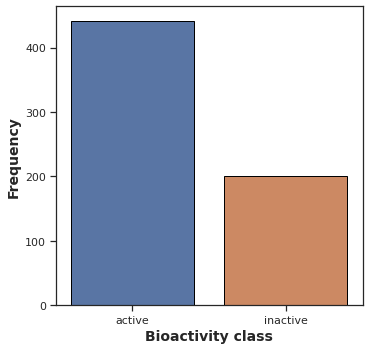

In [40]:
plt.figure(figsize=(5.5, 5.5))

sb.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

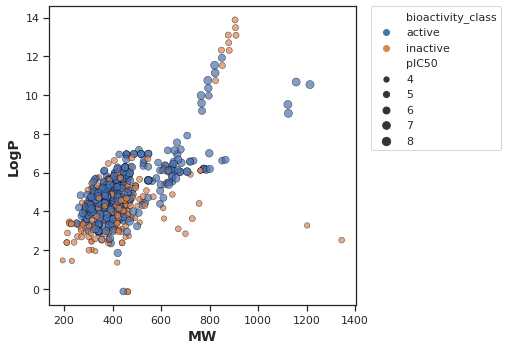

In [41]:
plt.figure(figsize=(5.5, 5.5))

sb.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## **Mann-Whitney U Test | Statistical Analysis**
The Mann-Whitney U test is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.



In [42]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df_m = df[selection]
  active = df_m[df_m['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df_m = df[selection]
  inactive = df_m[df_m['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

## **pIC50**

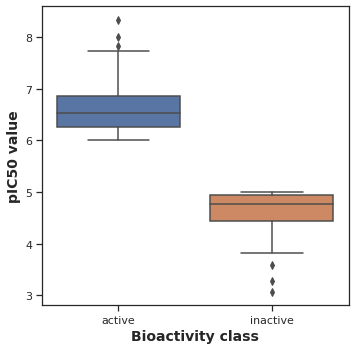

In [43]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [44]:
# Mann-Whitney U Test in pIC50

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,88842.0,5.160916e-92,0.05,Different distribution (reject H0)


## **MW**

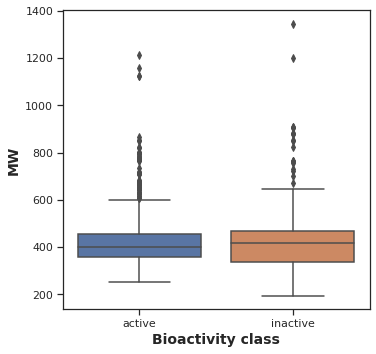

In [45]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'bioactivity_class', y = 'MW', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [46]:
# Mann-Whitney U Test in MW

mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,43599.5,0.70692,0.05,Same distribution (fail to reject H0)


## **LogP**

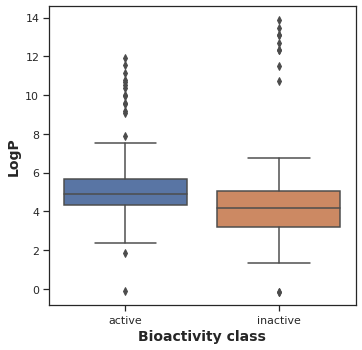

In [47]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'bioactivity_class', y = 'LogP', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [48]:
# Mann-Whitney U Test in LogP

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,60543.0,1.545188e-13,0.05,Different distribution (reject H0)


## **NumHDonors**

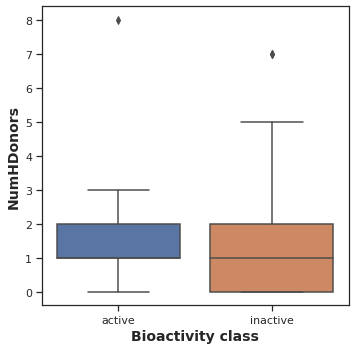

In [49]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [50]:
# Mann-Whitney U Test in NumHDonors

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,47328.0,0.138256,0.05,Same distribution (fail to reject H0)


## **NumHAcceptors**

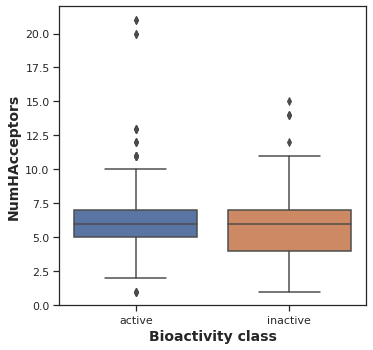

In [51]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [52]:
# Mann-Whitney U Test in NumHAcceptors

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,50836.0,0.002973,0.05,Different distribution (reject H0)


# **Descriptor Calculation and Dataset Preparation**

## **PaDEL-Descriptor**

In [53]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-01-28 02:23:32--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-01-28 02:23:32--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   160MB/s    in 0.2s    

2023-01-28 02:23:33 (160 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-01-28 02:23:33--  https://github

In [54]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [55]:
import pandas as pd

selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [56]:
! cat molecule.smi 

COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3	CHEMBL221371
COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c23)cc1	CHEMBL243168
COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccccc4[nH]c23)cc1OC	CHEMBL243167
COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccccc4[nH]c23)cc1	CHEMBL397235
COc1cc(C(F)(F)F)cc2[nH]c3ccccc3c(=O)c12	CHEMBL242513
COc1ccc2[nH]c3ccccc3c(=O)c2c1OC	CHEMBL242512
O=c1c2ccccc2[nH]c2cc(C(F)(F)F)cc(O)c12	CHEMBL242943
COc1cc(O)c2c(=O)c3ccccc3[nH]c2c1	CHEMBL242942
O=c1c2ccccc2[nH]c2ccc(O)cc12	CHEMBL242515
O=c1c2ccccc2[nH]c2cccc(O)c12	CHEMBL397685
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3cccc4c(=O)c5cccc(OC)c5[nH]c34)cc1)CC2	CHEMBL396298
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3ccccc3[N+](=O)[O-])cc1)CC2	CHEMBL442464
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3ccc4ncccc4c3)cc1)CC2	CHEMBL409234
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3cccnc3)cc1)CC2	CHEMBL409480
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3cccc4ccccc34)cc1)CC2	CHEMBL259976
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3ccccc3)cc1)CC2	CHEMBL471170
COc1cc2c(cc1OC)CN(CCc1ccc(NC(=O)c3ccc(Br)cc3)cc1)CC2	

In [57]:
! cat molecule.smi | wc -l

643


## **Fingerprint Descriptors**

In [58]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [59]:
! bash padel.sh

Processing CHEMBL221371 in molecule.smi (1/643). 
Processing CHEMBL243168 in molecule.smi (2/643). 
Processing CHEMBL243167 in molecule.smi (3/643). Average speed: 6.66 s/mol.
Processing CHEMBL397235 in molecule.smi (4/643). Average speed: 3.94 s/mol.
Processing CHEMBL242513 in molecule.smi (5/643). Average speed: 3.21 s/mol.
Processing CHEMBL242512 in molecule.smi (6/643). Average speed: 2.58 s/mol.
Processing CHEMBL242943 in molecule.smi (7/643). Average speed: 2.74 s/mol.
Processing CHEMBL242942 in molecule.smi (8/643). Average speed: 2.31 s/mol.
Processing CHEMBL242515 in molecule.smi (9/643). Average speed: 1.73 s/mol.
Processing CHEMBL397685 in molecule.smi (10/643). Average speed: 1.55 s/mol.
Processing CHEMBL396298 in molecule.smi (11/643). Average speed: 1.43 s/mol.
Processing CHEMBL442464 in molecule.smi (12/643). Average speed: 1.29 s/mol.
Processing CHEMBL409234 in molecule.smi (13/643). Average speed: 1.28 s/mol.
Processing CHEMBL409480 in molecule.smi (14/643). Average sp

In [60]:
! ls -l

total 111148
-rw-r--r-- 1 root root  1010668 Jan 28 02:20 bioactivity_data.csv
-rw-r--r-- 1 root root   122766 Jan 28 02:22 bioactivity_lipinski_calculation.csv
-rw-r--r-- 1 root root   132919 Jan 28 02:22 bioactivity_pIC50.csv
-rw-r--r-- 1 root root    81028 Jan 28 02:21 bioactivity_preprocessed_data_class.csv
-rw-r--r-- 1 root root    71960 Jan 28 02:21 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root    89112 Jan 28 02:22 bioactivity_without_intermediate.csv
-rw-r--r-- 1 root root  1154431 Jan 28 02:27 descriptors_output.csv
drwx------ 5 root root     4096 Jan 28 02:20 gdrive
drwxr-xr-x 3 root root     4096 Jan 28 02:23 __MACOSX
-rw-r--r-- 1 root root      124 Jan 28 02:22 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      121 Jan 28 02:22 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Jan 28 02:22 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Jan 28 02:22 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      125 Jan 28 02:22 mannwhitneyu_pIC50.csv
-rw

# **X & Y data of Matrices**

In [61]:
df_M_N = pd.read_csv('descriptors_output.csv')
df_M_N

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,...,PubchemFP831,PubchemFP832,PubchemFP833,PubchemFP834,PubchemFP835,PubchemFP836,PubchemFP837,PubchemFP838,PubchemFP839,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL221371,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL243168,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL243167,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL397235,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL242513,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,CHEMBL4848596,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
639,CHEMBL4879245,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,CHEMBL4868245,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,CHEMBL4861669,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Dropping Name column to make XY Matrix

df_M = df_M_N.drop(columns = ['Name'])
df_M

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,...,PubchemFP831,PubchemFP832,PubchemFP833,PubchemFP834,PubchemFP835,PubchemFP836,PubchemFP837,PubchemFP838,PubchemFP839,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
639,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **X Matrices**

In [63]:
X = df_M
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,...,PubchemFP831,PubchemFP832,PubchemFP833,PubchemFP834,PubchemFP835,PubchemFP836,PubchemFP837,PubchemFP838,PubchemFP839,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
639,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Y Matrices**

In [64]:
Y = df['pIC50']
Y

0      6.154902
1      6.251812
2      6.346787
3      6.455932
4      6.113509
         ...   
638    4.987163
639    4.742321
640    4.759451
641    4.790485
642    4.627088
Name: pIC50, Length: 643, dtype: float64

## **Combining X & Y variable of Matrices**

In [65]:
XY = pd.concat([X,Y], axis=1)
XY

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,...,PubchemFP832,PubchemFP833,PubchemFP834,PubchemFP835,PubchemFP836,PubchemFP837,PubchemFP838,PubchemFP839,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.154902
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.251812
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.346787
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.455932
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.987163
639,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.742321
640,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.759451
641,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.790485


In [66]:
XY.to_csv('bioactivity_pubChem_data.csv', index=False)

# **Types of Regressors**

In [67]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
     |████████████████████████████████| 255.9 MB 38 kB/s 
     |████████████████████████████████| 297 kB 61.5 MB/s 
     |████████████████████████████████| 24.8 MB 63.9 MB/s 
     |████████████████████████████████| 2.0 MB 70.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 


In [68]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [69]:
# Examine X dimension
X.shape

(643, 881)

In [70]:
# Remove low variance features 80:20 ratio
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(643, 162)

In [71]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **ML Algorithms**

In [72]:
ml = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = ml.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = ml.fit(X_train, X_test, Y_train, Y_test)

 93%|█████████▎| 39/42 [00:36<00:01,  1.92it/s]

[02:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:37<00:00,  1.13it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 95%|█████████▌| 40/42 [00:33<00:00,  2.04it/s]

[02:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:34<00:00,  1.22it/s]


In [73]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.88,0.92,0.29,0.07
ExtraTreeRegressor,0.88,0.92,0.29,0.10
ExtraTreesRegressor,0.88,0.92,0.29,2.08
GaussianProcessRegressor,0.88,0.92,0.29,0.43
RandomForestRegressor,0.80,0.86,0.37,0.84
BaggingRegressor,0.77,0.84,0.40,0.16
MLPRegressor,0.74,0.82,0.42,1.43
LGBMRegressor,0.69,0.79,0.46,0.17
HistGradientBoostingRegressor,0.69,0.79,0.46,4.29


In [74]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,4905132816278254069298657790787584.00,-1302925904323911183114260447232000.00,37111877792702328.00,0.15
LinearRegression,9365619192713948541485056.00,-2487742598064642614886400.00,1621645015272.54,0.07
TransformedTargetRegressor,9365619192713948541485056.00,-2487742598064642614886400.00,1621645015272.54,0.06
RANSACRegressor,19733690689343228739584.00,-5241761589356795002880.00,74437486851.53,1.30
KernelRidge,129.43,-33.11,6.01,0.05
GaussianProcessRegressor,76.33,-19.01,4.60,0.23
QuantileRegressor,5.34,-0.15,1.10,7.86
LassoLars,4.81,-0.01,1.03,0.06
DummyRegressor,4.81,-0.01,1.03,0.02


## **ML Model Performance**

[(0.0, 1.0)]

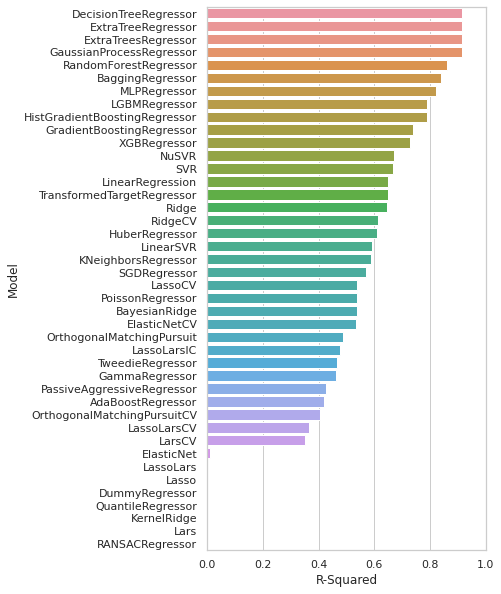

In [75]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sb

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sb.set_theme(style="whitegrid")
mlx = sb.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
mlx.set(xlim=(0, 1))

[(0.0, 10.0)]

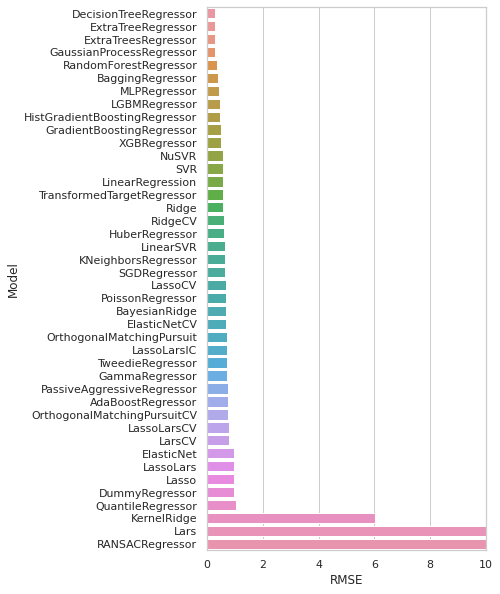

In [76]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(5, 10))
sb.set_theme(style="whitegrid")
mlx = sb.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
mlx.set(xlim=(0, 10))

[(0.0, 10.0)]

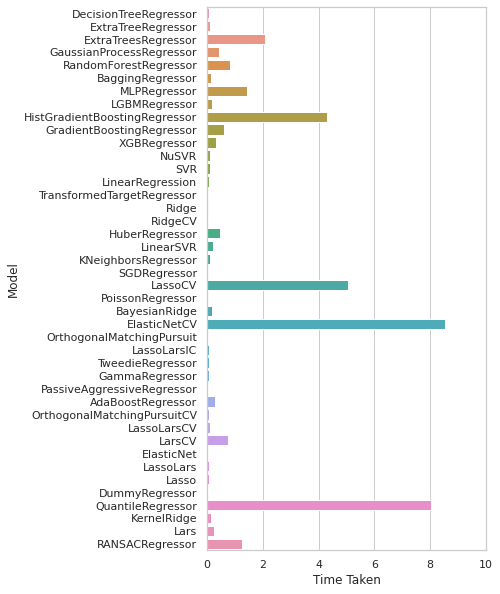

In [77]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(5, 10))
sb.set_theme(style="whitegrid")
mlx = sb.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
mlx.set(xlim=(0, 10))

# **Random Forest Regression Model**

In [78]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [79]:
# Examine X dimension
X.shape

(643, 162)

In [80]:
# Remove low variance features 80:20 ratio
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(643, 162)

In [81]:
Y.shape

(643,)

## **Data Split (80/20)**

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [83]:
X_train.shape, Y_train.shape

((514, 162), (514,))

In [84]:
X_test.shape, Y_test.shape

((129, 162), (129,))

## **Builing Random Forest Regression Model**

In [85]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
R2 = model.score(X_test, Y_test)
R2

0.43477729209512106

In [86]:
# Prediction Model

Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(*args, **kw)>

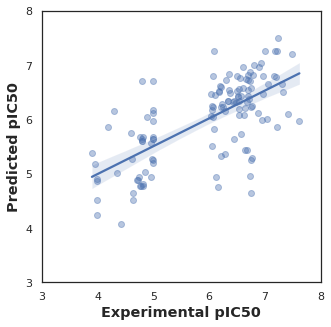

In [87]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(color_codes=True)
sb.set_style("white")

mlx = sb.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
mlx.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
mlx.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
mlx.set_xlim(3, 8)
mlx.set_ylim(3, 8)
mlx.figure.set_size_inches(5, 5)
plt.show

## **Predicted pIC50 vs Experimental pIC50 ML Model of 'ATP-binding cassette sub-family G member 2' Protein**